# Model Train History Visualization
# 학습 추이 시각화

`keras` 모델의 `fit()` 메소드는 `History` 오브젝트를 반환한다. 이 객체는 아래의 정보를 가지고 있다.  
- `loss` : 각 에포크마다의 학습 손실값
- `accuracy` : 각 에포크마다의 학습 정확도
- `val_loss` : 각 에포크마다의 검증 손실값
- `val_accuracy` : 각 에포크마다의 검증 정확도


`History.history` 속성은 연속된 에폭에 걸쳐 학습 손실 값과 학습 측정항목값을 기록하는 딕셔너리로, 또한 (적용 가능한 경우에는) 검증 손실 값과 검증 측정항목 값도 기록한다.

아래의 과정으로 `matplotlib` 을 training set 과 test set 에 대한 loss와 accuracy 플롯을 만들 수 있다.

In [1]:
# 학습 정확성 값과 검증 정확성 값을 플롯팅 합니다. 
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

# 학습 손실 값과 검증 손실 값을 플롯팅 합니다.
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

## MNIST 데이터셋 학습 과정 시각화

간단한 예시로, MNIST 데이터셋을 다층 퍼셉트론 모델로 학습시키는 간단한 예제로 학습과정을 시각화 해보겠다.

### 데이터셋 준비

In [2]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

# 훈련셋과 시험셋 로딩
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

# 훈련셋, 검증셋 선택
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

# 라벨링 전환
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

### 모델 구성 및 학습

In [3]:
# 모델 구성
model = Sequential()
model.add(Dense(units = 5, input_dim = 28 * 28, activation = 'relu'))
model.add(Dense(units = 15, activation = 'relu'))
model.add(Dense(units = 10, activation = 'softmax'))

# 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

# 모델 학습
hist = model.fit(X_train, Y_train, epochs = 50, batch_size = 10, validation_data=(X_val, Y_val))

Epoch 1/50
70/70 [==============================] - 1s 8ms/step - loss: 2.2678 - accuracy: 0.1054 - val_loss: 2.1406 - val_accuracy: 0.1633
Epoch 2/50
70/70 [==============================] - 0s 3ms/step - loss: 2.0921 - accuracy: 0.1794 - val_loss: 2.0326 - val_accuracy: 0.2300
Epoch 3/50
70/70 [==============================] - 0s 3ms/step - loss: 1.9826 - accuracy: 0.2556 - val_loss: 1.9473 - val_accuracy: 0.2833
Epoch 4/50
70/70 [==============================] - 0s 3ms/step - loss: 1.8751 - accuracy: 0.3204 - val_loss: 1.8643 - val_accuracy: 0.3267
Epoch 5/50
70/70 [==============================] - 0s 3ms/step - loss: 1.8004 - accuracy: 0.3774 - val_loss: 1.7874 - val_accuracy: 0.3833
Epoch 6/50
70/70 [==============================] - 0s 3ms/step - loss: 1.6633 - accuracy: 0.4636 - val_loss: 1.7140 - val_accuracy: 0.4233
Epoch 7/50
70/70 [==============================] - 0s 3ms/step - loss: 1.6072 - accuracy: 0.4855 - val_loss: 1.6450 - val_accuracy: 0.4233
Epoch 8/50
70/70 [==

### 모델 학습 과정 시각화

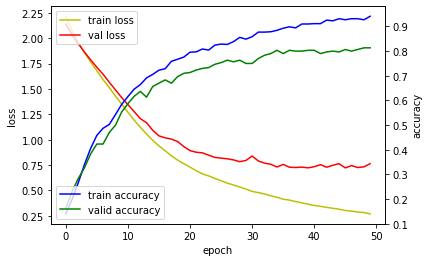

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label = 'train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label = 'val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label = 'train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label = 'valid accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

위와 같이 `matplotlib` 을 이용해서 한 눈에 학습 추이를 파악할 수 있다.